03 対数変換
=========

* 対数関数$log_a(x)$は、$log_a(a^b) = b$として定義される

    * $a$：底と呼ばれる正の実数
    
    * 入力$x$：正の実数
    
* $a=10$とした時、$10^0=1$より$log_{10}(1)=0$が成立する

    * 定義より、対数関数は$x \in(0,1)$の範囲の数を、負数全体$(-\infty,0)$に写す
    
    * 関数$log_{10}(x)$は、$[1,10]$の範囲を$[0,1]$に写し、$[10,100]$の範囲を$[1,2]$に写す
    
    * つまり、対数関数は、$x$のスケールが大きい時はその範囲を縮小し、小さい時には拡大する

* $x$軸の100から1000までの大きな範囲は、$y$軸では2.0から3.0の範囲に縮小されている

* 一方、$x$軸の1から100までの小さな範囲は$y$軸での0.0から2.0の範囲に写されており、$x\in[100, 1000]$が写される範囲よりも大きな範囲

    * また、$x$が大きくなるほど$log_{10}(x)$の増加速度が遅くなることも見て取れる

Text(0, 0.5, 'log10(x)')

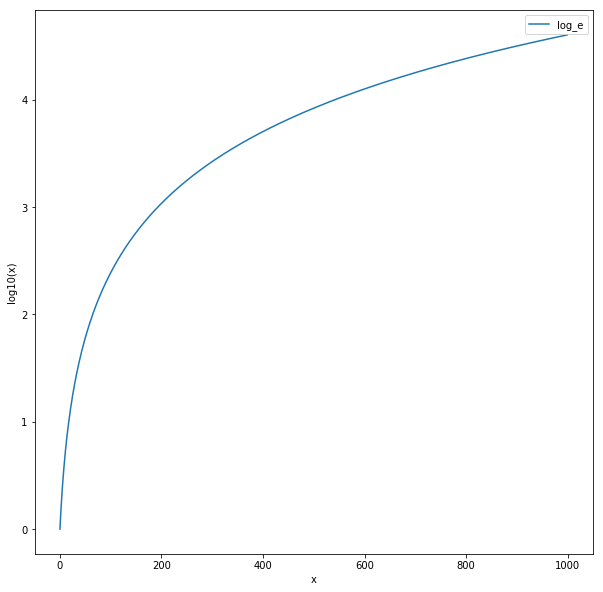

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

a = np.linspace(1,100,1000)
log_a = np.log(a)
fig = plt.figure(figsize=(10,10))
plt.plot(log_a, label="log_e")
plt.legend()
plt.xlabel('x')
plt.ylabel('log10(x)')

* 対数変換は、正の数値デーアが裾の重い分布(裾の部分の確率が常に正規分布よりも高くなる確率分布のこと)を持つ場合に強力な武器となる

    * データは、対数変換によって、上側の長い裾を短く圧縮し、下側を拡大することができる
    
    * 対数変換前のヒストグラムでは、値の小さい領域にデータが集中しているが、大きな値も取ることがある
    
    * 対数変換後のヒストグラムでは、値の小さい領域への集中は緩和され、$x$軸上でのデータの広がりが大きくなる

Text(0, 0.5, 'Occurrence')

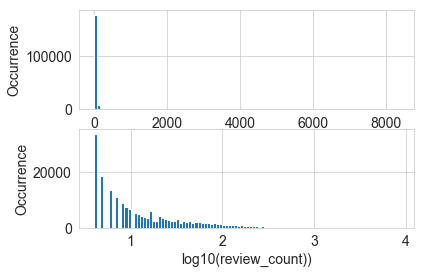

In [6]:
import numpy as np

# 例2-2で読み込んだ Yelp データセットの
# データフレーム biz_df を使用して、レビュー件数を対数変換する。
# レビュー件数 0 を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに 1 を加算していることに注意。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

* 例として、[Online News Popularityデータセット](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)を考える

### Online News Popularityデータセットの統計情報

* このデータセットには、ニュースサイトMashableに掲載された約2年分のニュース記事39,797本とその特徴量60個が含まれる

* このデータセットを用いて、ニュース記事の人気度を予測するタスクを考える

    * ニュース記事の人気度はソーシャルメディア上のシェア数で測る
    
    * このデータセットでは、記事内で使用された単語数(`n_token_count`)だけを特徴量として用いる

In [2]:
import pandas as pd
import numpy as np

# Online News Popularity データセットを UCI リポジトリからダウンロードし、
# Pandas を使ってデータフレームとして読み込む。
df = pd.read_csv('~/Downloads/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# ニュース記事に含まれる単語数 'n_tokens_content' に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


Text(0, 0.5, 'Number of Articles')

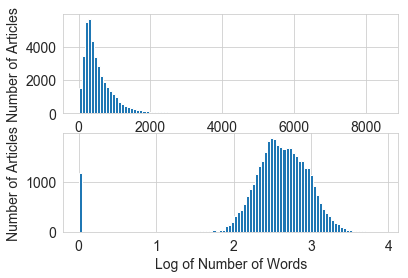

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(2,1)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

* 対数変換後の分布は、内容を含まない記事(単語数0)を除いて考えると、正規分布に近くなっていることがわかる

## 1.対数変換の実行

* ここでは、2つの教師あり学習を考える

    * Yelpデータセットでは、レビュー件数を用いて店舗の平均評価(`stars`)を予測するタスクを考える
    
    * Online News Popularityデータセットでは、単語数を用いてニュース記事のシェア数(`shares`)を予測するタスクを考える
    
        * 両方とも予想ターゲットは連続した数値なので、線形回帰モデルを用いて予測を行う
    
    * 特徴量に対して対数変換を行う場合と行わない場合について、scikit-learnを用いて線形回帰モデルを学習させ、10分割クロスバリデーションを使って評価
    
    * モデルの評価指数には$R^2$スコアを用いる。これは、学習済みの回帰モデルが新しいデータをどれだけうまく予測するかを表す指標
    
        * 予測の良いモデルほど$R^2$スコアは高くなり、モデルの予測が正解と完全に一致する場合は最大値1を取る
        
        * 一方、$R^2$スコアが低いほど悪いモデルであることを表し、マイナスになることもある
        
    * `クロスバリデーション`を使用して、$R^2$スコアの推定値だけでなく分散も計算する
    
        * 分散は2つのモデルを比較する時に$R^2$スコアの違いに意味があるかどうかを判断するのに役立つ

* まずはYelpデータセットに対して対数変換を適用してみる

In [5]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

with open('~/Downloads/business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
    
# 例2-2で読み込んだ Yelp データセットの
# データフレーム biz_df を使用して、レビュー件数を対数変換する。
# レビュー件数 0 を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに 1 を加算していることに注意。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,log_review_count
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ,0.778151
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,2.110590
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,2.232996
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ,0.602060
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC,0.698970


In [7]:
# 各店舗の平均評価（stars）を予測するために線形回帰モデルを学習する。
# 特徴量 review_count を対数変換した場合としない場合とで
# 10分割クロスバリデーションにより R2 スコアを比較する。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],
                              biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']],
                             biz_df['stars'], cv=10)
print('R-squared score without log transform: %0.5f (+/- %0.5f)' % (scores_orig.mean(), scores_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)' % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00160 (+/- 0.00090)
R-squared score with log transform: 0.00408 (+/- 0.00147)


* この結果より、学習されたモデルは対数変換の有無に関わらずターゲットをうまく予測できていない

    * 両方とも特徴量を1つしか使わないので、結果が悪くなるのは予測はできていた

* 次に、Online News Popularityデータセットについても同じ実験を行う

In [9]:
# Online News Popularity データセットを UCI リポジトリからダウンロードし、
# Pandas を使ってデータフレームとして読み込む。
df = pd.read_csv('~/Downloads/OnlineNewsPopularity.csv', delimiter=', ', engine='python')

# ニュース記事内に含まれる単語数 'n_tokens_content' に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

# 記事のシェア数を予測する2つの線形回帰モデルを学習する。
# 1つは元の特徴量であり、もう1つは対数変換をかけた特徴量を使う。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']],
                              df['shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']],
                             df['shares'], cv=10)
print('R-squared score without log transform: %0.5f (+/- %0.5f)'
      % (scores_orig.mean(), scores_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)'
      % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


* 信頼区間(標準偏差の2倍程度)に重なりがあるため有意とは言えないが、対数変換された特徴量を使ったモデルは、対数変換を使ったモデルより$R^2$がよくなる

    * ここで、特徴量とターゲット変数の散布図を描いてみる
    
    * 対数変換は$x$軸を伸縮させ、ターゲット変数の大きな外れ値(20万シェア以上)を軸の右側に引き出す
    
    * これによって、特徴量の分布の左側にゆとりができる
    
* 対数変換を行わない場合、線形モデルは入力のわずかな違いをもとにターゲット変数の大きな違いに対処する必要がある

Text(0, 0.5, 'Number of Shares')

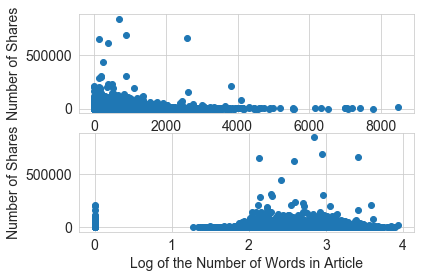

In [10]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

* Yelpレビューデータセットに対して同じ散布図を用いる

    * 店舗の評価は、1から5までの値を取る0.5刻みの離散値
    
    * レビュー件数の多い店舗(約2,500件以上のレビュー)では、件数と評価の高さに相関があるが、全体の関係は直線からはかけ離れている
    
        * そのため、対数変換前後のどちらの入力に対しても店舗の評価を予測する直線を描くことができない
        
        * したがって、店舗評価を予測するタスクに置いて、対数変換を行うかどうかに関係なく、レビュー件数は線形モデルの良い特徴量ではない

Text(0, 0.5, 'Average Star Rating')

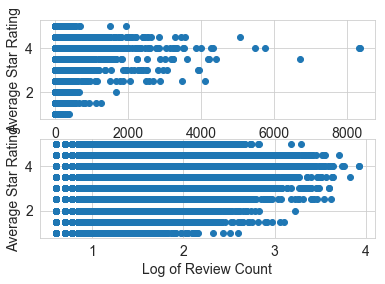

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

## 1.べき変換：対数変換の一般化

* 対数変換は、`べき変換`と呼ばれる変換の一種

    * これらは`分散安定化変換`と呼ばれる
    
    * これは、`ポアソン分布`を用いて考える
    
        * これは、平均と分散が等しいという性質をもつ裾の重い分布(平均が大きいほど分散が大きくなり裾が重くなる)
        
        * $\lambda$が大きくなると、分布の頂上が右に移動するだけでなく、分散も大きくなる

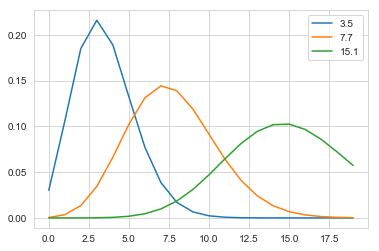

In [12]:
from scipy.stats import poisson

x = np.arange(0, 20, 1)
for mu in [3.5, 7.7, 15.1]:
    plt.plot(x, poisson.pmf(x, mu), label='{}'.format(mu))
        
plt.legend()   

* `分散安定化変換`は、分散が平均に依存しないように、変数の分布を変更する

    * 例)確率変数$X$がポアソン分布に従うと仮定する
    
        * $X$を平方根を使って変換すると、$\tilde{x} = \sqrt{X}$の分散はほぼ一定となる
        
        * すなわち、この変換により分布が平均に依存しなくなる

* 対数変換と平方根変換の一般化として`Box-Cox変換`が有名

    * これは、以下の式で表される
    
\begin{eqnarray}
\tilde{x} = \left\{
\begin{array}{ll}
\frac{x^{\lambda}-1}{\lambda} & (もし \lambda \neq 0) \\
ln(x) & (もし \lambda = 0)
\end{array}
\right.
\end{eqnarray}

* 以下の図に、それぞれの$\lambda$の値における図を表示する

    * $\lambda = 0.5$の時には平方根変換になる
    
    * $\lambda < 1$の場合は、対数変換と同じように大きな値を縮小するような変換となる
    
    * $\lambda > 1$の場合は逆に大きな値を拡大する変換となる

![Bow-Cox変換](./images/Bow-Cox変換.png)


* Box-Cox変換は、データが正の場合にのみ適用できる

    * データが負の値を含む場合、全ての値が正となるように定数を加えることで変数が適用できるようになる
    
    * `Box-Cox変換`や、`べき変換`を適用するときは、パラメータ$\lambda$の値を決定する必要がある
    
    * この値を決めるのに、`最尤法`を用いる
    
        * これは、変換後のデータが正規分布に最も近づくように$\lambda$が決定される
        
* SciPyの`stats`パッケージに含まれる`Box-Cox変換`の実装は、パラメータ$\lambda$の最適値を最尤法によって自動的に決定する機能がついている

* 例)Yelpデータセットのレビュー件数に対して`Box-Cox変換`を適用する

In [13]:
from scipy import stats

# 引き続き biz_df には Yelp のレビューデータが含まれるとする。
# Box-Cox 変換は入力がすべて正であることを仮定するため、
# まずは最小値を調べてマイナスの値を取らないか確認する。
# Check the min to make sure.
biz_df['review_count'].min()

3

In [14]:
# 引数 lambda に 0 を与えると対数変換になる（定数を足さない）
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
# 引数 lambda に何も与えなければ、scipy 実装では変換後のデータが
# 正規分布に最も近づくようにパラメータ lambda が自動的に決定される
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.37107910850437914

* 以下の図に、元データ、対数変換後、`Box-Cox変換`後で分布がどう変わるかを示す

Text(0, 0.5, 'Occurrence')

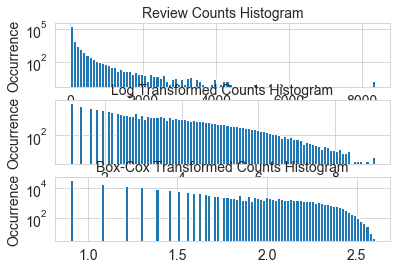

In [15]:
biz_df['rc_log'] = rc_log
biz_df['rc_bc'] = rc_bc

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# レビュー件数のヒストグラム
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 対数変換後のレビュー件数のヒストグラム
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# 最適な Box-Cox 変換後のレビュー件数のヒストグラム
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

* `確率プロット`：観測値の分位数と理論値の分位数の散布図

    * データの経験分布と理論分布を比較するために用いられる
    
    * 以下の図に、Yelpレビュー件数の元データと変換後のデータを正規分布と比較する確率プロットを示す
    
        * 元データの分布は、正規分布は正規分布よりもはるかに裾が重いことがわかる
        
        * 対数変換とBox-Cox変換の両方で、データの分布が正規分布に近づいていることがわかる
        
        * 対数変換とBox-Cox変換では赤い対角線の下側で裾が平らになっている
        
            * これは、対数変換よりもBox-Cox変換の方が裾を収縮させていることを示している

|  版  |    年/月/日    |
|-----|------------------|
|初版|2019/04/15|